## Problem Statement
Building a model to Predict the Price of the Properties given in the Airbnb Dataset.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings(action='ignore')

### Read Data

In [2]:
df = pd.read_csv('Airbnb_Data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.shape

(74111, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.shape

(74111, 29)

### Finding for Redundant Variables and Dropping them

In [6]:
for i in list(df.columns):
    print(df[i].value_counts())
    print('----------------------------------')

id
6901257     1
2460250     1
289037      1
16492690    1
14838028    1
           ..
14222061    1
6238463     1
15285110    1
11226321    1
3534845     1
Name: count, Length: 74111, dtype: int64
----------------------------------
log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64
----------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutiq

name
Bunk bed in the Treat Street Clubhouse           8
Your home away from home                         7
East Village Studio                              7
Cozy Private Room                                6
Location, Location, Location                     6
                                                ..
Charming studio apartment in Adams Morgan.       1
Studio City cozy studio w/ parking               1
SPACIOUS UPPER HAIGHT HOME IN THE HEART OF SF    1
Downtown LA Luxury Apartment 2                   1
Cozy Boat at Shoreline Village                   1
Name: count, Length: 73359, dtype: int64
----------------------------------
neighbourhood
Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64
--------

In [7]:
# We are dropping 'Id' because all of the values are unique.
# We are dropping 'Amenities', because it has text type Data.
# we are dropping 'Description', because it has text type Data.
# we are dropping 'latitude' and 'longitude', because all of the values are unique.
# We are dropping 'Name' because all of the values are unique.
# We are dropping 'thumbnail_url' because all of the values are unique.
# We are dropping 'zipcode' Because it is not giving any meaning in the numbers.

df.drop(['id','amenities','description','latitude','longitude','name','thumbnail_url','zipcode'],axis=1,inplace=True)

### Checking for Duplicate Records

In [8]:
df.duplicated().sum()

120

In [9]:
df.drop_duplicates(inplace=True)

## Feature Engineering

### Login Price

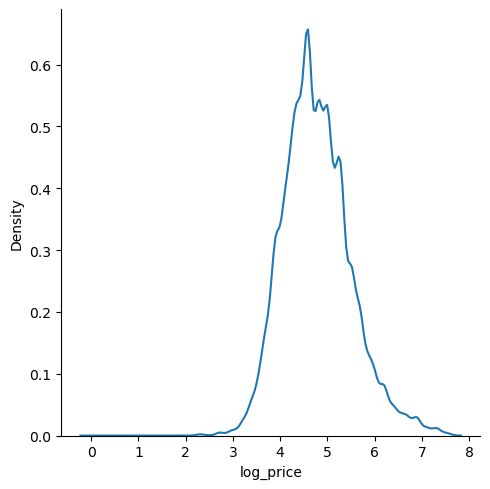

In [10]:
sns.displot(df.log_price,kind='kde')

In [11]:
# We can see that our Traget Variable is Not Normally Distributed.

In [12]:
df.log_price.isna().sum()

0

<Axes: >

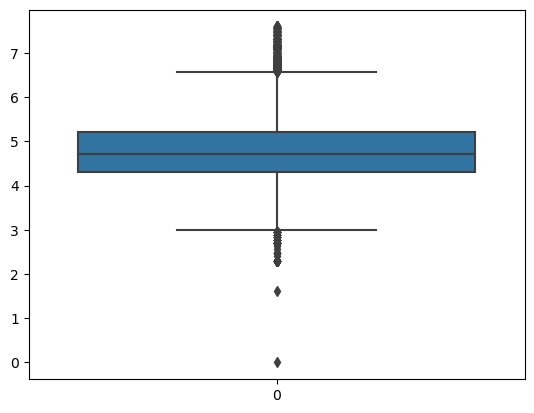

In [13]:
sns.boxplot(df.log_price)

In [14]:
# We can see that our Data has Outliers

### Property Type

<Axes: xlabel='property_type'>

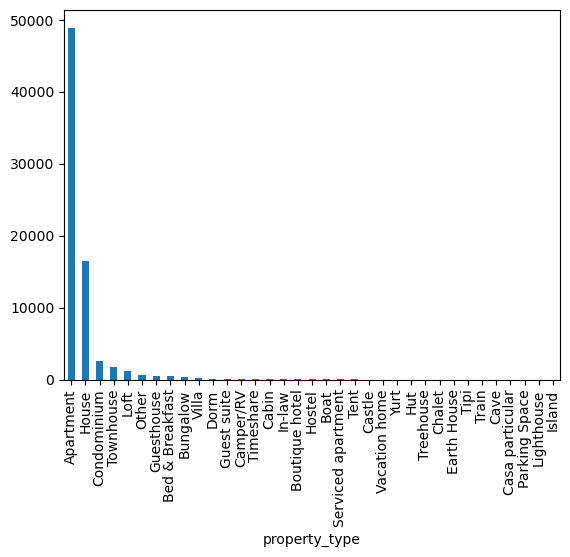

In [15]:
df.property_type.value_counts().plot(kind='bar')

In [16]:
# We can see that Apartment and House are the most Rented out property type in our Data.

In [17]:
df.property_type.isna().sum()

0

In [18]:
df = pd.concat([df,pd.get_dummies(df.property_type,drop_first=True,dtype='int')],axis=1)
df.drop('property_type',axis=1,inplace=True)

### Room Type

<Axes: xlabel='room_type'>

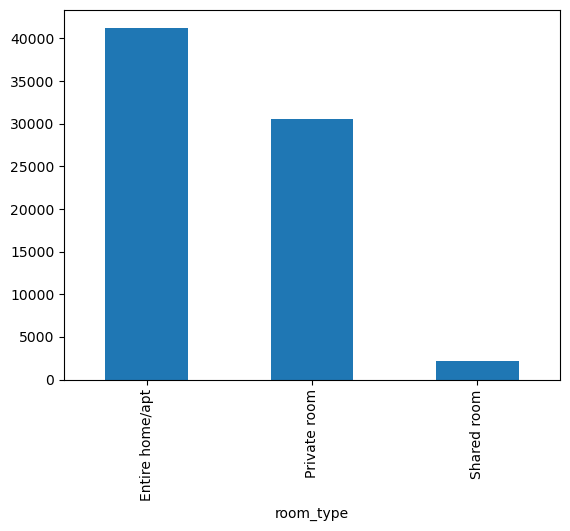

In [19]:
df.room_type.value_counts().plot(kind='bar')

In [20]:
# We can see that Entire Home and Private Room was the most room type in our Data.

In [21]:
df.room_type.isna().sum()

0

In [22]:
df = pd.concat([df,pd.get_dummies(df.room_type,drop_first=True,dtype='int')],axis=1)
df.drop('room_type',axis=1,inplace=True)

### Accommodates

<Axes: xlabel='accommodates'>

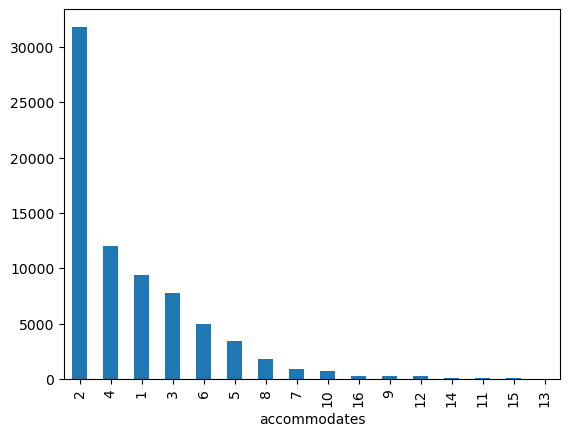

In [23]:
df.accommodates.value_counts().plot(kind='bar')

In [24]:
# We can say that higher the accommodates, higher the Price.
# So we will leave this column as it is.

In [25]:
df.accommodates.isna().sum()

0

### No of Bathrooms

<Axes: xlabel='bathrooms'>

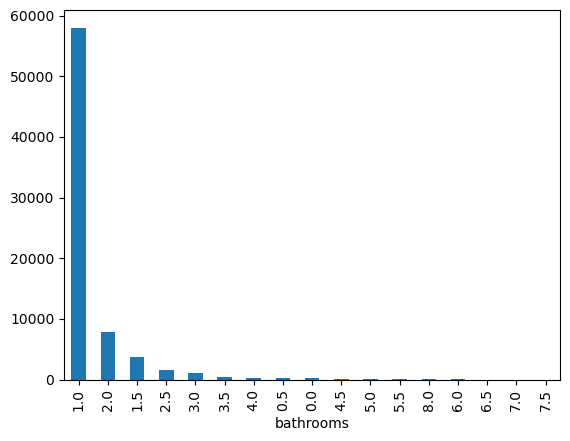

In [26]:
df.bathrooms.value_counts().plot(kind='bar')

In [27]:
# We can say that higher the bathrooms, higher the Price.
# So we will leave this column as it is.

In [28]:
df.bathrooms.isna().sum()

200

In [29]:
df = df[~df.bathrooms.isna()]

# We are Dropping the Null Values bacause it has only 200 Records.
# Just we dont want to impute mode of the Data.

### Bed Type

<Axes: xlabel='bed_type'>

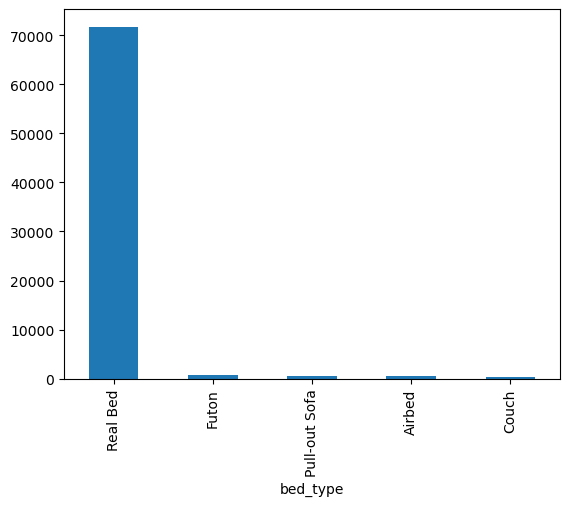

In [30]:
df.bed_type.value_counts().plot(kind='bar')

In [31]:
# We can see that most of the Properties has Real Bed.

In [32]:
df.bed_type.isna().sum()

0

In [33]:
df = pd.concat([df,pd.get_dummies(df.bed_type,drop_first=True,dtype='int')],axis=1)
df.drop('bed_type',axis=1,inplace=True)

### Cancellation Policy

<Axes: xlabel='cancellation_policy'>

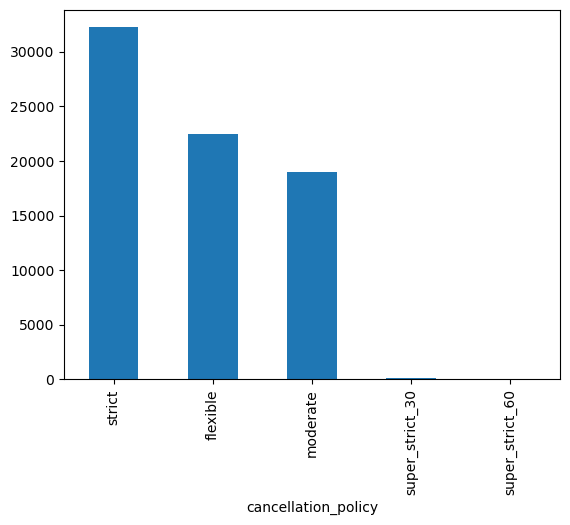

In [34]:
df.cancellation_policy.value_counts().plot(kind='bar')

In [35]:
df.groupby('cancellation_policy')['log_price'].mean()

# we can see there is not much Price difference when it comes to Cancellation_Policy,
# So we can go for dummy Encoding

cancellation_policy
flexible           4.678661
moderate           4.721588
strict             4.888193
super_strict_30    5.496327
super_strict_60    6.541007
Name: log_price, dtype: float64

In [36]:
df.cancellation_policy.isna().sum()

0

In [37]:
df = pd.concat([df,pd.get_dummies(df.cancellation_policy,drop_first=True,dtype='int')],axis=1)
df.drop('cancellation_policy',axis=1,inplace=True)

### Cleaning Fee

<Axes: xlabel='cleaning_fee'>

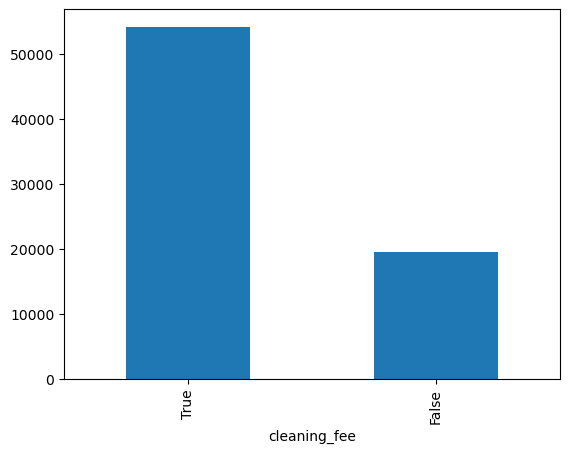

In [38]:
df.cleaning_fee.value_counts().plot(kind='bar')

In [39]:
# We can see that there is only 2 sub-classes so we can go for Dummy Encoding.

In [40]:
df.cleaning_fee.isna().sum()

0

In [41]:
df.cleaning_fee = df.cleaning_fee.astype('int')

In [42]:
df.cleaning_fee = df.cleaning_fee.replace({1:'Cleaning_fee_Yes',0:'Cleaning_fee_No'})

In [43]:
df = pd.concat([df,pd.get_dummies(df.cleaning_fee,drop_first=True,dtype='int')],axis=1)
df.drop('cleaning_fee',axis=1,inplace=True)

### City

<Axes: xlabel='city'>

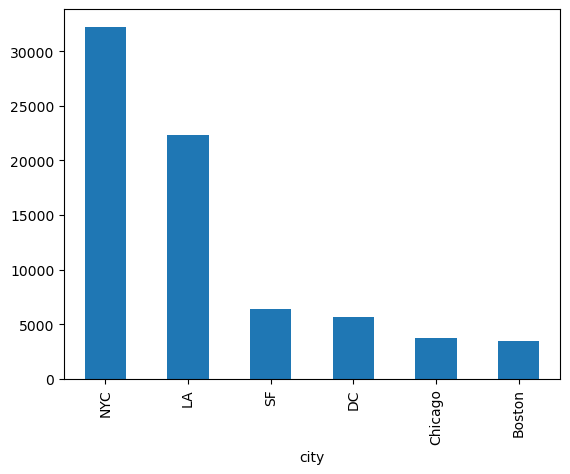

In [44]:
df.city.value_counts().plot(kind='bar')

In [45]:
# We can see that only 6 types of cities are in the data so we can go for dummy Encoding

In [46]:
df.city.isna().sum()

0

In [47]:
df = pd.concat([df,pd.get_dummies(df.city,drop_first=True,dtype='int')],axis=1)
df.drop('city',axis=1,inplace=True)

### First Review

In [48]:
df.first_review.value_counts()

first_review
2017-01-01    293
2017-01-22    249
2016-01-02    221
2017-01-02    211
2017-09-04    193
             ... 
2011-05-30      1
2011-07-07      1
2010-11-21      1
2010-05-22      1
2010-12-01      1
Name: count, Length: 2534, dtype: int64

In [49]:
# We can see that there is no use of the First Review Variable Because the Date is random and has no Patterns in it.

In [50]:
df.drop('first_review',axis=1,inplace=True)

### Host has Profile Pic

<Axes: xlabel='host_has_profile_pic'>

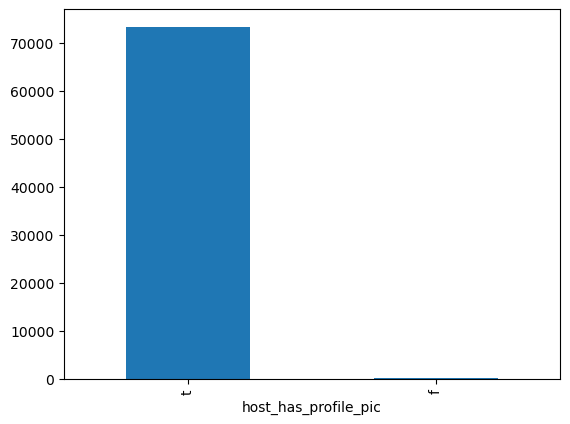

In [51]:
df.host_has_profile_pic.value_counts().plot(kind='bar')

In [52]:
# we can see that hosts who didn't upload profile picture is extremely less

In [53]:
df.host_has_profile_pic.isna().sum()

187

In [54]:
df = df[~df.host_has_profile_pic.isnull()]

In [55]:
df = pd.concat([df,pd.get_dummies(df.host_has_profile_pic,drop_first=True,dtype='int')],axis=1)
df.drop('host_has_profile_pic',axis=1,inplace=True)

### Host Identity Verified

<Axes: xlabel='host_identity_verified'>

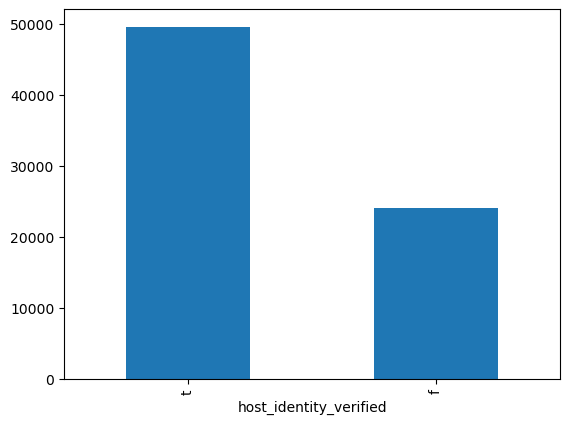

In [56]:
df.host_identity_verified.value_counts().plot(kind='bar')

In [57]:
# We can see that hosts who verified their identity is double compared to not verified.

In [58]:
df.host_identity_verified.isna().sum()

0

In [59]:
df = pd.concat([df,pd.get_dummies(df.host_identity_verified,drop_first=True,dtype='int')],axis=1)
df.drop('host_identity_verified',axis=1,inplace=True)

### Host Response Rate

In [60]:
df.host_response_rate.value_counts()

host_response_rate
100%    43128
90%      2273
80%      1111
0%        878
50%       606
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: count, Length: 80, dtype: int64

In [61]:
df.host_response_rate.isna().sum()

18027

In [62]:
# We have too many null values, so we will try to bucket them without imputing synthetic Data.

In [63]:
def obj_convert(a):
    if a is np.NaN:
        return a
    else:
        l=[]
        for i in a:
            if i in ['0','1','2','3','4','5','6','7','8','9']:
                l.append(i)
        return int(''.join(l))

In [64]:
df.host_response_rate = df.host_response_rate.apply(obj_convert)

In [65]:
def bucket1(x):
    if x<33:
        return 'Low Response'
    elif x>=33 and x<66:
        return 'Medium Response'
    elif x>=66:
        return 'Good Response'
    else:
        return 'Unknown Response'

In [66]:
df.host_response_rate = df.host_response_rate.apply(bucket1)

In [67]:
df = pd.concat([df,pd.get_dummies(df.host_response_rate,drop_first=True,dtype='int')],axis=1)
df.drop('host_response_rate',axis=1,inplace=True)

### Host Since

In [68]:
import datetime as dt

In [69]:
df.host_since = pd.to_datetime(df.host_since)

df['host_since_year'] = df.host_since.dt.year
df['host_since_month'] = df.host_since.dt.month
df['host_since_date'] = df.host_since.dt.day

In [70]:
df.drop('host_since',axis=1,inplace=True)

### Instant Bookable

<Axes: xlabel='instant_bookable'>

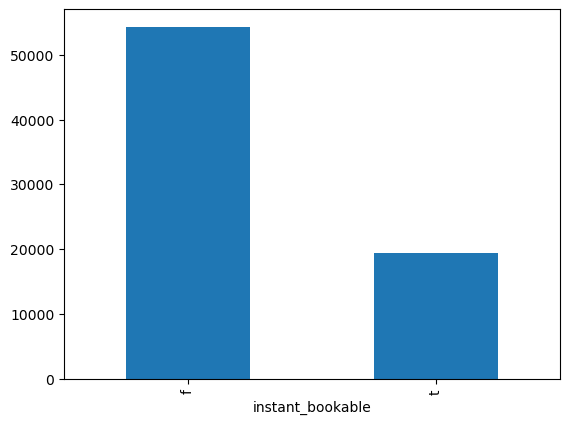

In [71]:
df.instant_bookable.value_counts().plot(kind='bar')

In [72]:
# We can infer that nearly 1/3 of the properties are instantly Bookable

In [73]:
df.instant_bookable.isna().sum()

0

In [74]:
df = pd.concat([df,pd.get_dummies(df.instant_bookable,drop_first=True,dtype='int')],axis=1)
df.drop('instant_bookable',axis=1,inplace=True)

### Last Review

In [75]:
df.last_review.value_counts()

last_review
2017-04-30    1342
2017-09-24    1275
2017-09-17    1207
2017-04-23    1024
2017-09-18     826
              ... 
2013-10-26       1
2011-03-28       1
2014-11-21       1
2014-07-17       1
2013-12-28       1
Name: count, Length: 1357, dtype: int64

In [76]:
# We can see that the Last Review Variable is not relevent to predecting the Price by the Model.
# So we are Planning to drop them.

In [77]:
df.drop('last_review',axis=1,inplace=True)

### Neighbourhood

In [78]:
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          2847
Bedford-Stuyvesant    2143
Bushwick              1590
Mid-Wilshire          1388
Upper West Side       1381
                      ... 
Arrochar                 1
Edison Park              1
Mill Basin               1
Graniteville             1
Grant City               1
Name: count, Length: 619, dtype: int64

In [79]:
# There are too many unique values in our Data, So we are Planning to drop them

In [80]:
df.drop('neighbourhood',axis=1,inplace=True)

### No of Reviews

<Axes: ylabel='Density'>

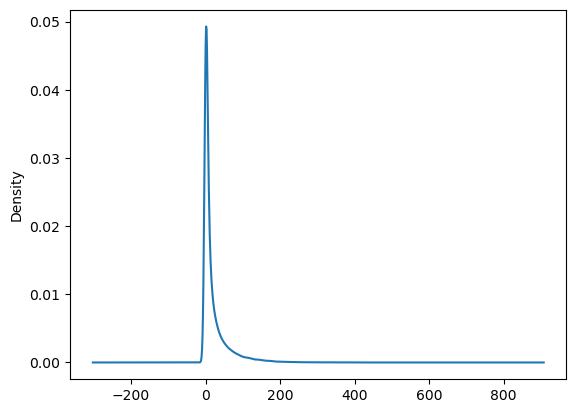

In [81]:
df.number_of_reviews.plot(kind='kde')

In [82]:
# We can see that our data is right Skewed.

In [83]:
df.number_of_reviews.isna().sum()

0

<Axes: >

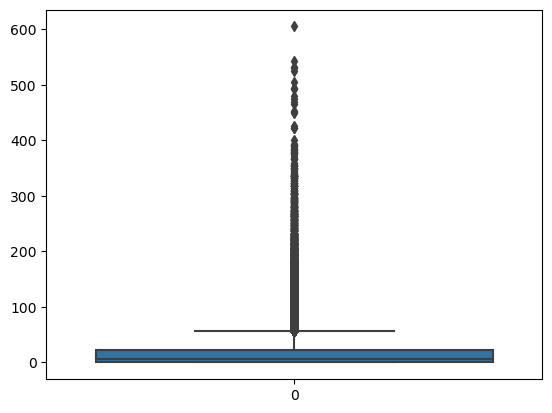

In [84]:
sns.boxplot(df.number_of_reviews)

In [85]:
# We can say that there are more outliers in our Data which we cant Drop.

### Review Scores Rating

In [86]:
df.review_scores_rating.value_counts()

review_scores_rating
100.0    16146
98.0      4352
97.0      4066
96.0      4063
95.0      3697
93.0      3628
90.0      2830
99.0      2622
94.0      2610
80.0      2146
92.0      2052
91.0      1605
87.0      1111
89.0      1108
88.0      1050
85.0       620
86.0       508
60.0       442
84.0       434
83.0       396
82.0       210
70.0       195
73.0       156
81.0       126
75.0        99
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        36
50.0        30
65.0        27
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
62.0         3
66.0         3
55.0         3
57.0         3
27.0         2
35.0         1
49.0         1
58.0         1
54.0         1
56.0         1
Name: count, dtype: int64

In [87]:
df.review_scores_rating.isna().sum()

16514

In [88]:
# It looks like 'Review scores Rating' has too much null Values so we will try to bucket them.

In [89]:
def bucket2(x):
    if x<65:
        return 'Low Scores'
    elif x>=65 and x<85:
        return 'Medium Scores'
    elif x>=85:
        return 'Good Scores'
    else:
        return 'Unknown Scores'

In [90]:
df.review_scores_rating = df.review_scores_rating.apply(bucket2)

In [91]:
df = pd.concat([df,pd.get_dummies(df.review_scores_rating,dtype='int')],axis=1)
df.drop('review_scores_rating',axis=1,inplace=True)

### Number of Reviews

<Axes: ylabel='Density'>

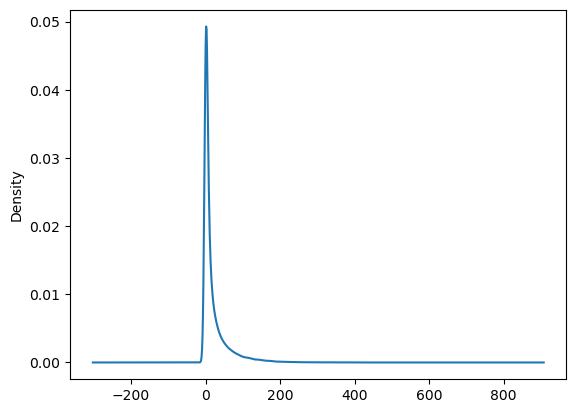

In [92]:
df.number_of_reviews.plot(kind='kde')

In [93]:
# We can see that our Data is Right Skewed.

In [94]:
df.number_of_reviews.isna().sum()

0

<Axes: >

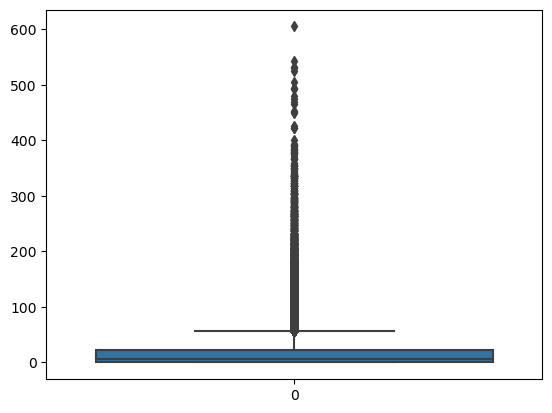

In [95]:
sns.boxplot(df.number_of_reviews)

In [96]:
# We can see that there are many outliers in our Data.

### Number of Bedrooms

In [97]:
df.bedrooms.value_counts()

bedrooms
1.0     49364
2.0     11306
0.0      6692
3.0      4299
4.0      1328
5.0       354
6.0       105
7.0        38
8.0        14
10.0       10
9.0         8
Name: count, dtype: int64

In [98]:
df.bedrooms.isna().sum()

86

In [99]:
df = df[~df.bedrooms.isnull()]

### Number of Beds

In [100]:
df.beds.value_counts()

beds
1.0     44751
2.0     16614
3.0      6426
4.0      3053
5.0      1286
6.0       658
7.0       215
8.0       185
10.0       85
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: count, dtype: int64

In [101]:
df.beds.isnull().sum()

58

In [102]:
df = df[~df.beds.isnull()]

### Linear Regression - Base Model

### Before Assumptions

In [103]:
corr = df.corr()
corr[(corr>0.65)|(corr<-0.65)][:40]

,log_price,accommodates,bathrooms,number_of_reviews,bedrooms,beds,Bed & Breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Condominium,Dorm,Earth House,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,Lighthouse,Loft,Other,Parking Space,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Private room,Shared room,Couch,Futon,Pull-out Sofa,Real Bed,moderate,strict,super_strict_30,super_strict_60,Cleaning_fee_Yes,Chicago,DC,LA,NYC,SF,t,t,Low Response,Medium Response,Unknown Response,host_since_year,host_since_month,host_since_date,t,Good Scores,Low Scores,Medium Scores,Unknown Scores
log_price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,1.000000,NaN,NaN,0.710456,0.811644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,0.710456,NaN,NaN,1.000000,0.710391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,NaN,0.811644,NaN,NaN,0.710391,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bed & Breakfast,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boutique hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bungalow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# We can see that bedrooms and bathrooms are highly correlated with each other
# So we can drop the variable 'Bed'.

In [105]:
df.drop('beds',axis=1,inplace=True)

### Splitting the Data

In [106]:
from sklearn.model_selection import train_test_split

x = df.drop('log_price',axis=1)
y = df.log_price
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

### Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [108]:
from sklearn.metrics import mean_absolute_percentage_error

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  0.07470783019159992
Testing:  0.07542748722873588


### Gradient Desentent

In [109]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=10)
sgd.fit(xtrain,ytrain)
ytpred = sgd.predict(xtrain)
ypred = sgd.predict(xtest)

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  1.000000000000023
Testing:  1.000000000000023


### Removing Insignificant Variable using VIF

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(len(df.drop('log_price',axis=1).columns)):
    vif.append(variance_inflation_factor(df.drop('log_price',axis=1).values,i))
pd.DataFrame(vif,index=df.drop('log_price',axis=1).columns).sort_values(by=0)

,0
Island,1.000177e+00
Cave,1.000282e+00
Lighthouse,1.000298e+00
Casa particular,1.000303e+00
Treehouse,1.000548e+00
...,...
Low Scores,1.510028e+04
Medium Scores,9.111421e+04
Unknown Scores,3.492324e+05
Good Scores,1.102047e+06


In [111]:
# First Iteration
# We can see that the Variable 'Good Score' is having highest Variance Inflaction Factor,
# So we are Planning to Drop Them

In [112]:
df.drop('Good Scores',axis=1,inplace=True)

In [113]:
# Second Iteration
# We can see that the Variable 'host_since_year' is having highest Variance Inflaction Factor,
# So we are Planning to Drop Them

In [114]:
df.drop('host_since_year',axis=1,inplace=True)

In [115]:
# Third Iteration
# We can see that the Variable 't' is having highest Variance Inflaction Factor,
# So we are Planning to Drop Them

In [116]:
df.drop('t',axis=1,inplace=True)

In [117]:
# Forth Iteration
# We can see that the Variable 'Real Bed' is having highest Variance Inflaction Factor,
# So we are Planning to Drop Them

In [118]:
df.drop('Real Bed',axis=1,inplace=True)

### Logestic Regression after Removing Insignificent Variables

In [119]:
x = df.drop('log_price',axis=1)
y = df.log_price
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

lr = LinearRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  0.0750120888218503
Testing:  0.07571133705029542


### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

dtr = DecisionTreeRegressor(random_state=10)
dtr.fit(xtrain,ytrain)
ytpred = dtr.predict(xtrain)
ypred = dtr.predict(xtest)

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  0.0013502430417222362
Testing:  0.09983591416725288


In [121]:
np.cumsum(pd.DataFrame(dtr.feature_importances_,index=xtrain.columns)).sort_values(by=0).tail(50)

,0
Castle,0.310596
Cave,0.310599
Chalet,0.310602
Condominium,0.316021
Dorm,0.316564
Earth House,0.316575
Guest suite,0.317037
Guesthouse,0.318002
Hostel,0.318103
House,0.328516


### Hyperparameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state=10)

params = {'max_depth':[5,6,7,8,9,10]}

gs = GridSearchCV(estimator=dtr,param_grid=params,scoring='neg_mean_absolute_percentage_error',cv=3,n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

{'max_depth': 8}

### Tuned Decision Tree

In [123]:
dtr = DecisionTreeRegressor(max_depth=8,random_state=10)
dtr.fit(xtrain,ytrain)
ytpred = dtr.predict(xtrain)
ypred = dtr.predict(xtest)

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  0.0718803042871258
Testing:  0.07389682874536826


### Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=8,random_state=10)
rf.fit(xtrain,ytrain)
ytpred = rf.predict(xtrain)
ypred = rf.predict(xtest)

print('Training: ',mean_absolute_percentage_error(ytpred,ytrain))
print('Testing: ',mean_absolute_percentage_error(ypred,ytest))

Training:  0.07113237111552487
Testing:  0.07292876371466885
